In [15]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
digits = load_digits()

## Determining the amount of data and columns

In [4]:
print(f'Size of data: {digits.data.shape}')
print(f'Size of labels: {digits.target.shape}')

Size of data: (1797, 64)
Size of labels: (1797,)


## Displaying sample data

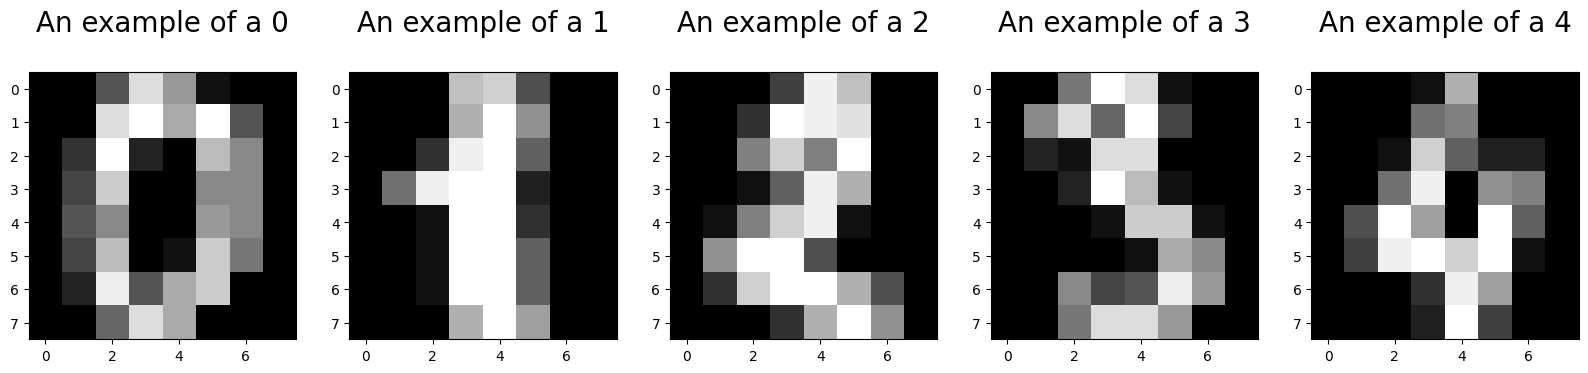

In [11]:
plt.figure(figsize=(20, 4))

for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('An example of a %i\n' % label, fontsize = 20)

## Dividing the data into training data and test data

In [13]:
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size = 0.23, random_state = 3)

## Checking the sizes of the training and testing data

In [14]:
print(f'Size of the training data: {x_train.shape}')
print(f'Size of the testing data: {x_test.shape}')
print(f'Size of the training labels: {y_train.shape}')
print(f'Size of the testing labels: {y_test.shape}')

Size of the training data: (1383, 64)
Size of the testing data: (414, 64)
Size of the training labels: (1383,)
Size of the testing labels: (414,)


## Train the model

In [16]:
logisticReg = LogisticRegression()
logisticReg.fit(x_train, y_train)

c:\Users\shikoto\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

## Testing the model by predicting the output of the first ten elements of the test set

## Generating predictions for the test set

In [21]:
predictions = logisticReg.predict(x_test)
print(predictions[0:100])

[0 4 1 2 0 0 8 7 6 6 3 6 9 7 4 7 4 3 2 6 7 3 4 7 1 0 7 4 8 3 4 0 5 5 5 1 2
 9 0 0 0 8 2 3 7 0 1 7 1 3 8 4 2 9 6 0 4 5 4 8 7 9 9 5 0 3 7 4 9 1 8 0 9 3
 0 2 7 8 1 1 9 3 3 2 2 3 8 2 4 6 9 5 8 4 7 3 7 2 5 6]


## Determining the accuracy of the model

In [20]:
score = logisticReg.score(x_test, y_test)
print(score)

0.9516908212560387


Text(0.5, 1.0, 'Accuracy score: 0.9516908212560387')

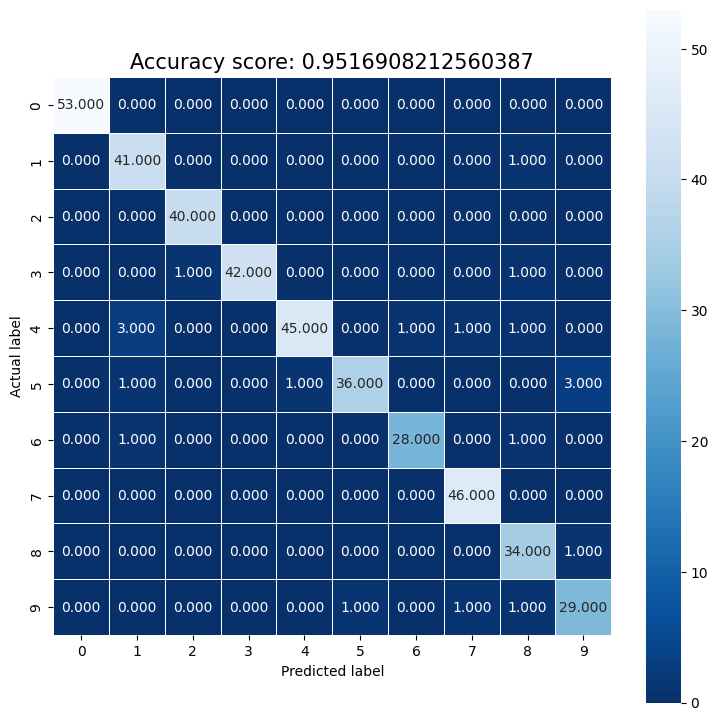

In [30]:
cm = metrics.confusion_matrix(y_test, predictions)
plt.figure(figsize = (9,9))
sns.heatmap(cm, annot = True, fmt = ".3f", linewidths = .5, square = True, cmap = "Blues_r")
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
# all_sample_title = 'Accuracy score: {0}'.format(score)
all_sample_title = f'Accuracy score: {score}'
plt.title(all_sample_title, size = 15)